## 0. Импорт базовых библиотек и чтение данных

Данные отсюда https://www.kaggle.com/harlfoxem/housesalesprediction/data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%pylab inline

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('kc_house_data.csv', parse_dates=['date'])
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
#проверю наличие пропусков и тип данных

df.isnull().mean(), \
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


(id               0.0
 date             0.0
 price            0.0
 bedrooms         0.0
 bathrooms        0.0
 sqft_living      0.0
 sqft_lot         0.0
 floors           0.0
 waterfront       0.0
 view             0.0
 condition        0.0
 grade            0.0
 sqft_above       0.0
 sqft_basement    0.0
 yr_built         0.0
 yr_renovated     0.0
 zipcode          0.0
 lat              0.0
 long             0.0
 sqft_living15    0.0
 sqft_lot15       0.0
 dtype: float64, None)

Нет ни пропущенных данных, ни категориальных признаков. Вероятно, нужно будет нормализовать данные, тк есть признаки типа года постройки-реставрации, почт. индекс и тд.

In [11]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,75000.00,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370000e+00,9.300000e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.110000e+00,7.700000e-01,0.00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184400e+02,290.00,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,520.00,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


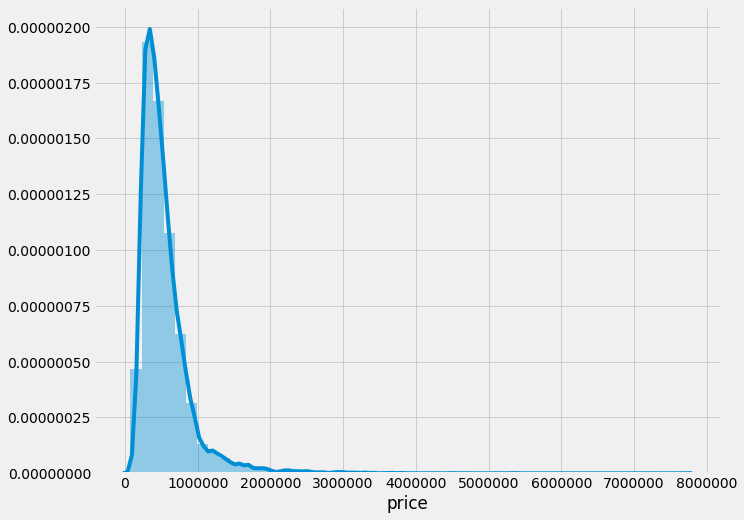

In [14]:
#исследую распределение целевой переменной
plt.figure(figsize = (10,8))
plt.style.use('fivethirtyeight')

sns.distplot(df['price']);

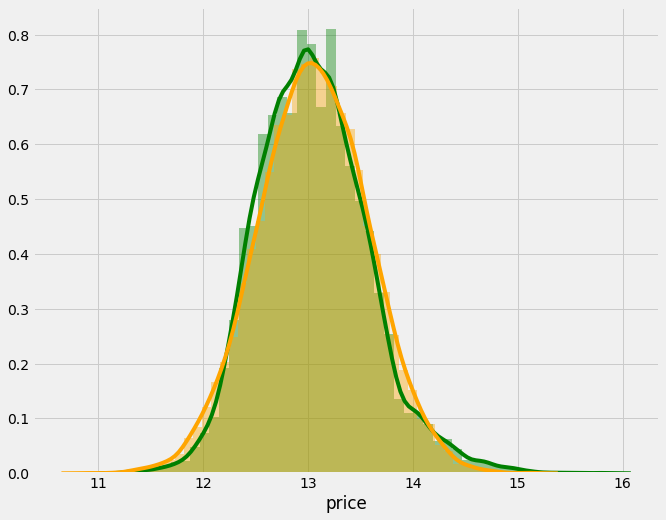

In [16]:
#прологарифмирую целевую переменную
lg = np.log(df['price'])
norm = np.random.normal(np.mean(lg)
                , np.std(lg)
                , size = len(lg))

plt.figure(figsize=(10,8))
sns.distplot(lg, color = 'green')
sns.distplot(norm, color = 'orange');

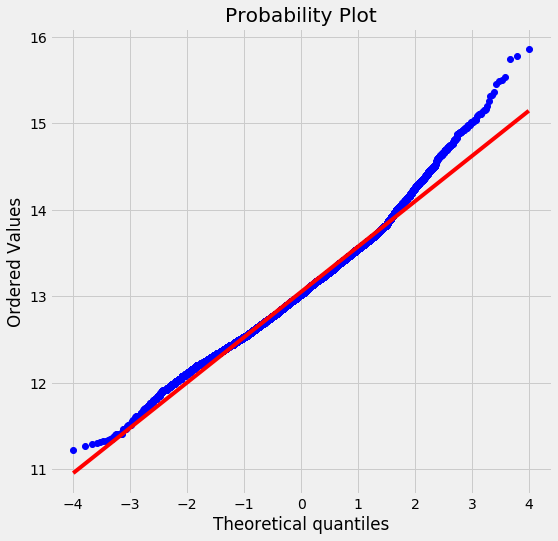

In [18]:
#проверка на нормальность и скошенность
from scipy import stats

fig = plt.figure(figsize=(8, 8))
res = stats.probplot(lg, plot=plt)
plt.show()

In [19]:
stats.shapiro(lg)

/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9891936779022217, 6.016636161953938e-37)

## 1. Бейзлайн

Тк пропусков и колиячественных признаков нет, построю сразу бейзлайн.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.year

X = df.drop(['price', 'id', 'date'], axis = 1)
y = df['price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)
print('y_train median is :', y_train.median())
print('y_test median is :', y_test.median())

y_train median is : 450000.0
y_test median is : 451000.0


In [46]:
def rmsle(y_test, y_pred):
    return np.square(np.log(y_pred+1) - np.log(y_test+1)).mean**0.5

def fit_model(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return model.score(X_test, y_test) #, rmsle(y_test, pred)

In [47]:
fit_model(RandomForestRegressor(random_state=17))

0.8615627154258608